In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

df = pd.read_csv('machine.data_update.csv')

print(df.head())
print(df.describe())
print(df.info())

  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   3

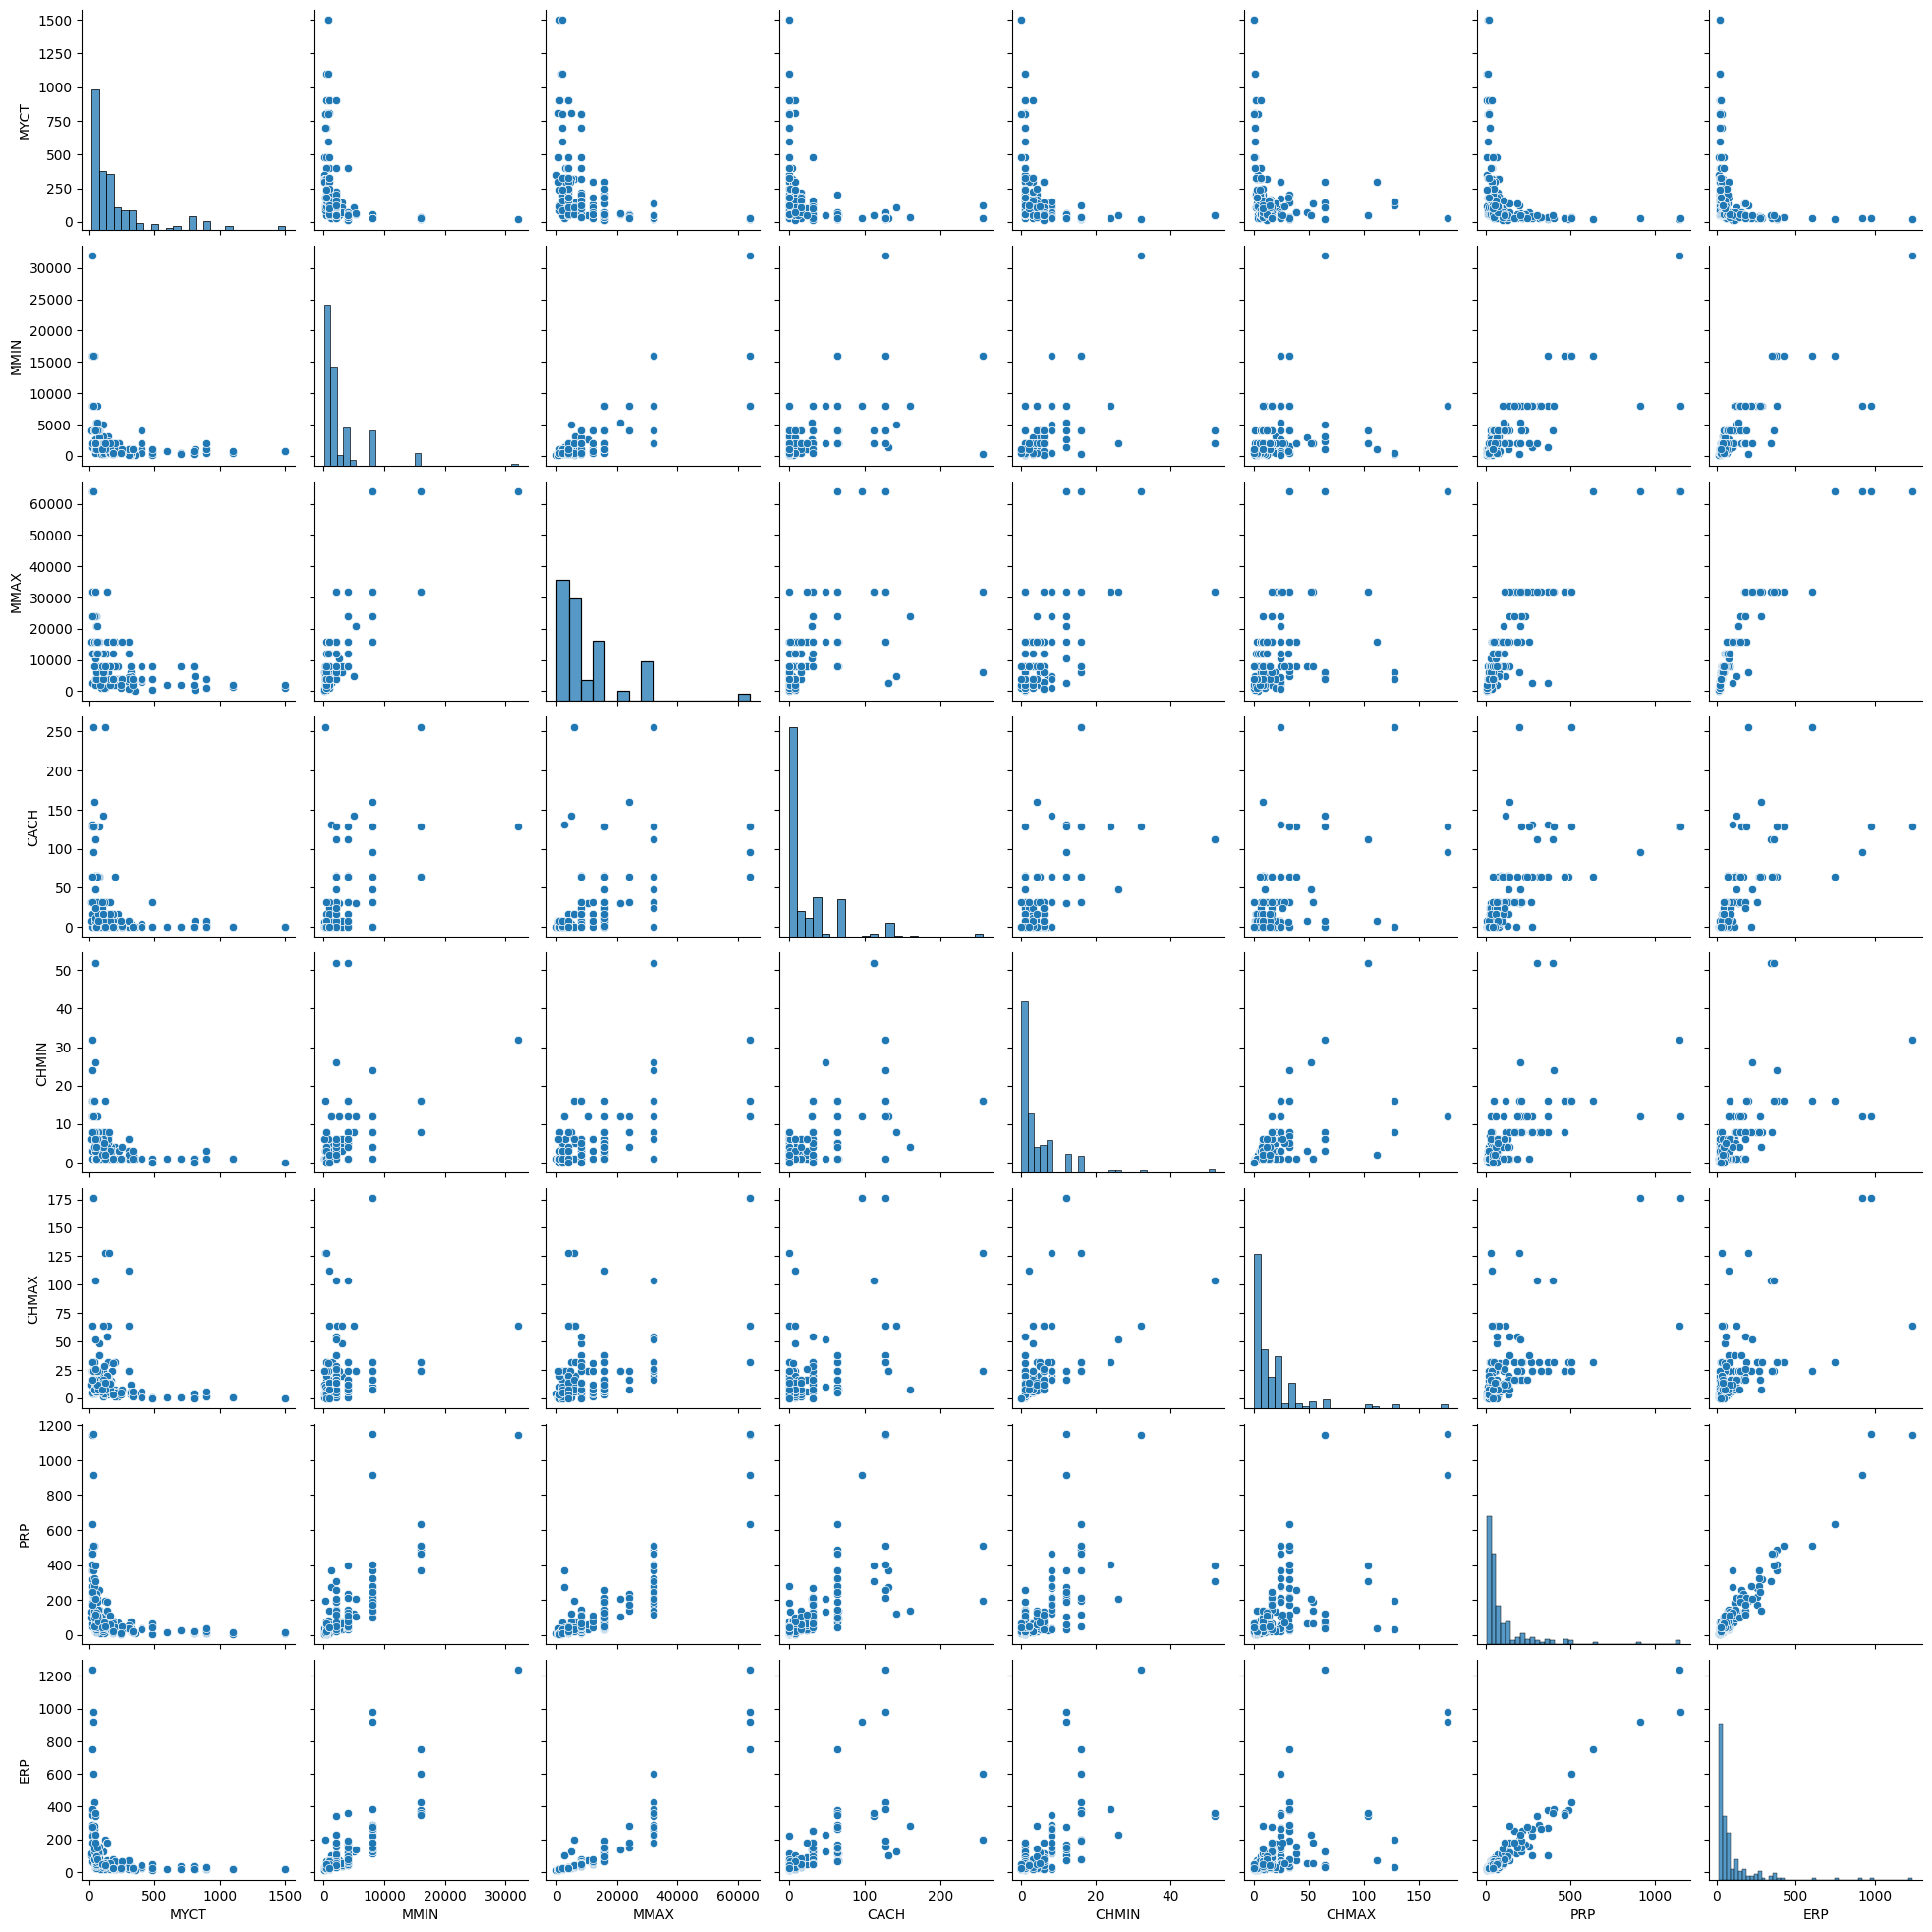

In [4]:
sns.pairplot(df)
plt.show()

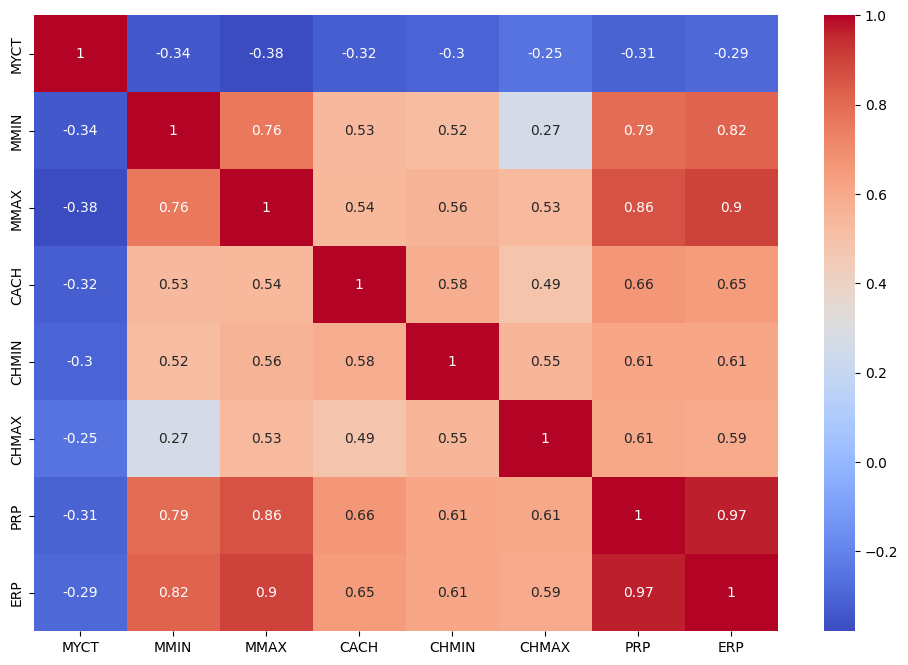

In [5]:
plt.figure(figsize=(12, 8))

numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [6]:
df = df.dropna()

X = df.drop('PRP', axis=1)
y = df['PRP']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'교차 검증 점수: {cv_scores}')
print(f'평균 교차 검증 점수: {cv_scores.mean()}')

교차 검증 점수: [0.55586301 0.71859754 0.75907895 0.88234474 0.8526335 ]
평균 교차 검증 점수: 0.7537035480771104


In [8]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'훈련 데이터 MSE: {mse_train}, MAE: {mae_train}, R^2: {r2_train}')
print(f'테스트 데이터 MSE: {mse_test}, MAE: {mae_test}, R^2: {r2_test}')

훈련 데이터 MSE: 2.6922320552870614e-26, MAE: 1.1730337260422733e-13, R^2: 1.0
테스트 데이터 MSE: 6421.599780740677, MAE: 42.69995337105076, R^2: 0.8738558881509428


In [9]:
ridge = Ridge()
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2')
grid_search_ridge.fit(X_train_scaled, y_train)

print(f'Best Ridge Parameters: {grid_search_ridge.best_params_}')
best_ridge = grid_search_ridge.best_estimator_

y_train_pred_ridge = best_ridge.predict(X_train_scaled)
y_test_pred_ridge = best_ridge.predict(X_test_scaled)

mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)

mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

print(f'Ridge 회귀 훈련 데이터 MSE: {mse_train_ridge}, MAE: {mae_train_ridge}, R^2: {r2_train_ridge}')
print(f'Ridge 회귀 테스트 데이터 MSE: {mse_test_ridge}, MAE: {mae_test_ridge}, R^2: {r2_test_ridge}')

lasso = Lasso()
param_grid_lasso = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='r2')
grid_search_lasso.fit(X_train_scaled, y_train)

print(f'Best Lasso Parameters: {grid_search_lasso.best_params_}')
best_lasso = grid_search_lasso.best_estimator_

y_train_pred_lasso = best_lasso.predict(X_train_scaled)
y_test_pred_lasso = best_lasso.predict(X_test_scaled)

mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print(f'Lasso 회귀 훈련 데이터 MSE: {mse_train_lasso}, MAE: {mae_train_lasso}, R^2: {r2_train_lasso}')
print(f'Lasso 회귀 테스트 데이터 MSE: {mse_test_lasso}, MAE: {mae_test_lasso}, R^2: {r2_test_lasso}')

Best Ridge Parameters: {'alpha': 0.1}
Ridge 회귀 훈련 데이터 MSE: 0.0010420555746630694, MAE: 0.015889819079040413, R^2: 0.9999999457953013
Ridge 회귀 테스트 데이터 MSE: 6296.6753225974835, MAE: 41.73352922583287, R^2: 0.876309869301864
Best Lasso Parameters: {'alpha': 0.1}
Lasso 회귀 훈련 데이터 MSE: 1.4349516853085524, MAE: 1.158430030613764, R^2: 0.9999253579888889
Lasso 회귀 테스트 데이터 MSE: 2521.3562979609987, MAE: 29.069054189801516, R^2: 0.9504711813689778


C:\Users\hs020\바탕 화면\python_basic_1\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.867e+02, tolerance: 1.499e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\hs020\바탕 화면\python_basic_1\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.176e+02, tolerance: 2.826e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\hs020\바탕 화면\python_basic_1\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 